In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data3 = pd.read_excel('demo3.xlsx')
data3['year'] = data3['year']-2011

In [3]:
data3_G6 = data3[data3['放牧小区（plot）'] == 'G6']
data3_G8 = data3[data3['放牧小区（plot）'] == 'G8']
data3_G9 = data3[data3['放牧小区（plot）'] == 'G9']
data3_G11 = data3[data3['放牧小区（plot）'] == 'G11']
data3_G12 = data3[data3['放牧小区（plot）'] == 'G12']
data3_G13 = data3[data3['放牧小区（plot）'] == 'G13']
data3_G16 = data3[data3['放牧小区（plot）'] == 'G16']
data3_G17 = data3[data3['放牧小区（plot）'] == 'G17']
data3_G18 = data3[data3['放牧小区（plot）'] == 'G18']
data3_G19 = data3[data3['放牧小区（plot）'] == 'G19']
data3_G20 = data3[data3['放牧小区（plot）'] == 'G20']
data3_G21 = data3[data3['放牧小区（plot）'] == 'G21']

1.拉格朗日插值

In [4]:
def lagrange(x, y, num_points, x_test):
    # 所有的基函数值，每个元素代表一个基函数的值
    l = np.zeros(shape=(num_points, ))

    # 计算第k个基函数的值
    for k in range(num_points):
        # 乘法时必须先有一个值
        # 由于l[k]肯定会被至少乘n次，所以可以取1
        l[k] = 1
        # 计算第k个基函数中第k_个项（每一项：分子除以分母）
        for k_ in range(num_points):
            # 这里没搞清楚，书中公式上没有对k=k_时，即分母为0进行说明
            # 有些资料上显示k是不等于k_的
            if k != k_:
                # 基函数需要通过连乘得到
                l[k] = l[k]*(x_test-x[k_])/(x[k]-x[k_])
            else:
                pass 
    # 计算当前需要预测的x_test对应的y_test值        
    L = 0
    for i in range(num_points):
        # 求所有基函数值的和
        L += y[i]*l[i]
    return L

In [5]:
def cz(xt,data):
    x = list(data['year'])
    y_SOC = list(data['SOC土壤有机碳'])
    y_SIC = list(data['SIC土壤无机碳'])
    y_STC = list(data['STC土壤全碳'])
    y_N = list(data['全氮N'])
    x_t = xt
    y_SOC1 = [lagrange(x, y_SOC, len(x), x_i) for x_i in x_t]
    y_SIC1 = [lagrange(x, y_SIC, len(x), x_i) for x_i in x_t]
    y_STC1 = [lagrange(x, y_STC, len(x), x_i) for x_i in x_t]
    y_N1 = [lagrange(x, y_N, len(x), x_i) for x_i in x_t]

    y_SOC = pd.DataFrame({'t': x_t,
                     'SOC': y_SOC1,
                     'SIC': y_SIC1,
                     'STC': y_STC1,
                     'N': y_N1})
    return y_SOC

In [6]:
x_t = list(np.linspace(1,9, 9))
data3_G6 = cz(x_t, data3_G6)
data3_G8 = cz(x_t, data3_G8)
data3_G9 = cz(x_t, data3_G9)
data3_G11 = cz(x_t, data3_G11)
data3_G12 = cz(x_t, data3_G12)
data3_G13 = cz(x_t, data3_G13)
data3_G16 = cz(x_t, data3_G16)
data3_G17 = cz(x_t, data3_G17)
data3_G18 = cz(x_t, data3_G18)
data3_G19 = cz(x_t, data3_G19)
data3_G20 = cz(x_t, data3_G20)
data3_G21 = cz(x_t, data3_G21)

In [7]:
'''
def daoc(data,name):
    data['t'] = data['t']+2011
    data.to_excel(name+".xlsx")

daoc(data3_G6,"G6")
daoc(data3_G8,"G8")
daoc(data3_G9,"G9")
daoc(data3_G11,"G11")
daoc(data3_G12,"G12")
daoc(data3_G13,"G13")
daoc(data3_G16,"G16")
daoc(data3_G17,"G17")
daoc(data3_G18,"G18")
daoc(data3_G19,"G19")
daoc(data3_G20,"G20")
daoc(data3_G21,"G21")
'''

'\ndef daoc(data,name):\n    data[\'t\'] = data[\'t\']+2011\n    data.to_excel(name+".xlsx")\n\ndaoc(data3_G6,"G6")\ndaoc(data3_G8,"G8")\ndaoc(data3_G9,"G9")\ndaoc(data3_G11,"G11")\ndaoc(data3_G12,"G12")\ndaoc(data3_G13,"G13")\ndaoc(data3_G16,"G16")\ndaoc(data3_G17,"G17")\ndaoc(data3_G18,"G18")\ndaoc(data3_G19,"G19")\ndaoc(data3_G20,"G20")\ndaoc(data3_G21,"G21")\n'

2.灰色关联度分析

In [8]:
year = data3_G6['t']

In [9]:
def hb1(data1,data2,data3,data4,lie):
    data = pd.DataFrame({'year':year,
                        'NG':data1[lie],
                        'LCI':data2[lie],
                        'MGI':data3[lie],
                        'HGI':data4[lie]})
    return data
#G17,G6,G8,G9
soc_hs1 = hb1(data3_G17,data3_G6,data3_G8,data3_G9,'SOC')
sic_hs1 = hb1(data3_G17,data3_G6,data3_G8,data3_G9,'SIC')
stc_hs1 = hb1(data3_G17,data3_G6,data3_G8,data3_G9,'STC')
n_hs1 = hb1(data3_G17,data3_G6,data3_G8,data3_G9,'N')
#G19,G12,G11,G13
soc_hs2 = hb1(data3_G19,data3_G12,data3_G11,data3_G13,'SOC')
sic_hs2 = hb1(data3_G19,data3_G12,data3_G11,data3_G13,'SIC')
stc_hs2 = hb1(data3_G19,data3_G12,data3_G11,data3_G13,'STC')
n_hs2 = hb1(data3_G19,data3_G12,data3_G11,data3_G13,'N')
#G21,G18,G16,G20
soc_hs3 = hb1(data3_G21,data3_G18,data3_G16,data3_G20,'SOC')
sic_hs3 = hb1(data3_G21,data3_G18,data3_G16,data3_G20,'SIC')
stc_hs3 = hb1(data3_G21,data3_G18,data3_G16,data3_G20,'STC')
n_hs3 = hb1(data3_G21,data3_G18,data3_G16,data3_G20,'N')

In [10]:
# 无量纲化
def dimensionlessProcessing(df_values,df_columns):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    res = scaler.fit_transform(df_values)
    return pd.DataFrame(res,columns=df_columns)

# 求第一列(影响因素)和其它所有列(影响因素)的灰色关联值
def GRA_ONE(data,m=0): # m为参考列
    # 标准化
    data = dimensionlessProcessing(data.values,data.columns)
    # 参考数列
    std = data.iloc[:,m]
    # 比较数列
    ce = data.copy()
    
    n = ce.shape[0]
    m = ce.shape[1]
    
    # 与参考数列比较，相减
    grap = np.zeros([n,m])
    for i in range(m):
        for j in range(n):
            grap[j,i] = abs(ce.iloc[j,i] - std[j])
            
    # 取出矩阵中的最大值和最小值
    mmax = np.amax(grap)
    mmin = np.amin(grap)
    ρ = 0.5 # 灰色分辨系数
    
    # 计算值
    grap = pd.DataFrame(grap).applymap(lambda x:(mmin+ρ*mmax)/(x+ρ*mmax))
    
    # 求均值，得到灰色关联值
    RT = grap.mean(axis=0)
    return pd.Series(RT)

# 调用GRA_ONE，求得所有因素之间的灰色关联值
def GRA(data):
    list_columns = np.arange(data.shape[1])
    df_local = pd.DataFrame(columns=list_columns)
    for i in np.arange(data.shape[1]):
        df_local.iloc[:,i] = GRA_ONE(data,m=i)
    df_local.columns = soc_hs1.columns
    df_local.index = soc_hs1.columns    
    return df_local

In [11]:
soc_gra1 = GRA(soc_hs1)
soc_gra2 = GRA(soc_hs2)
soc_gra3 = GRA(soc_hs3)

sic_gra1 = GRA(sic_hs1)
sic_gra2 = GRA(sic_hs2)
sic_gra3 = GRA(sic_hs3)

stc_gra1 = GRA(stc_hs1)
stc_gra2 = GRA(stc_hs2)
stc_gra3 = GRA(stc_hs3)

n_gra1 = GRA(n_hs1)
n_gra2 = GRA(n_hs2)
n_gra3 = GRA(n_hs3)

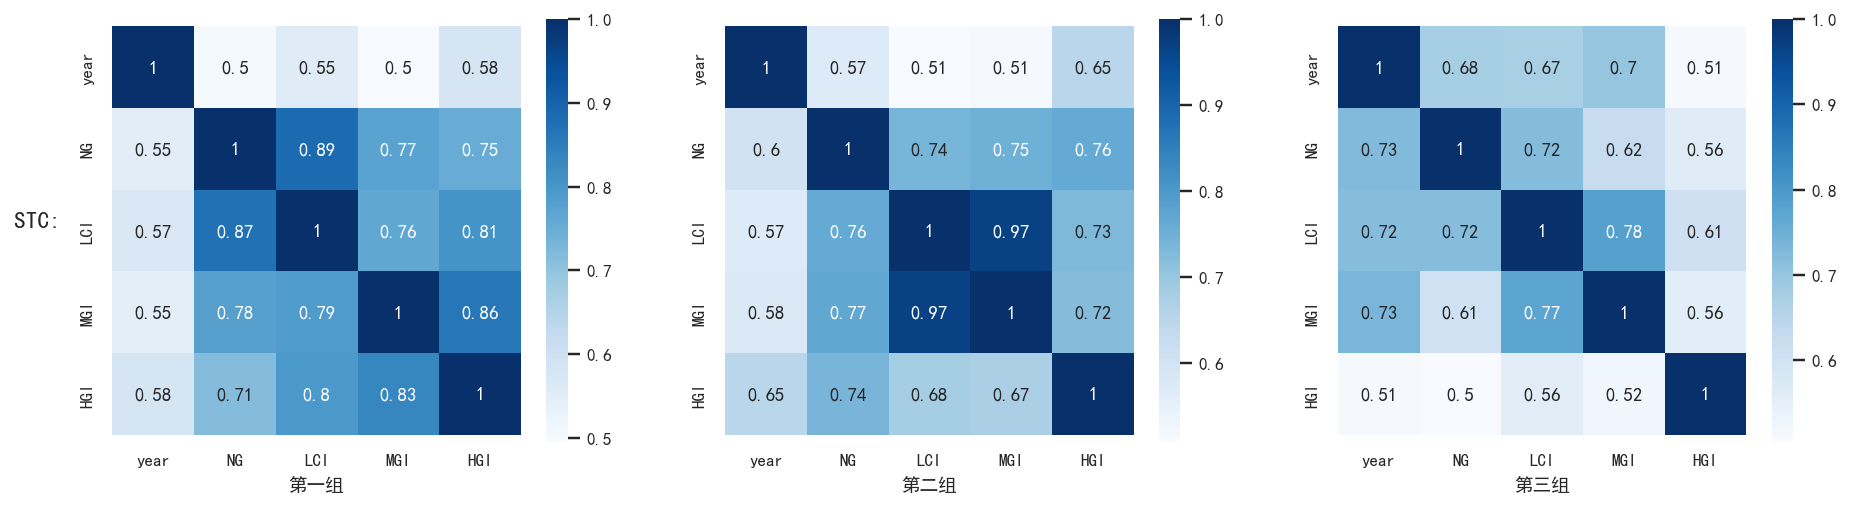

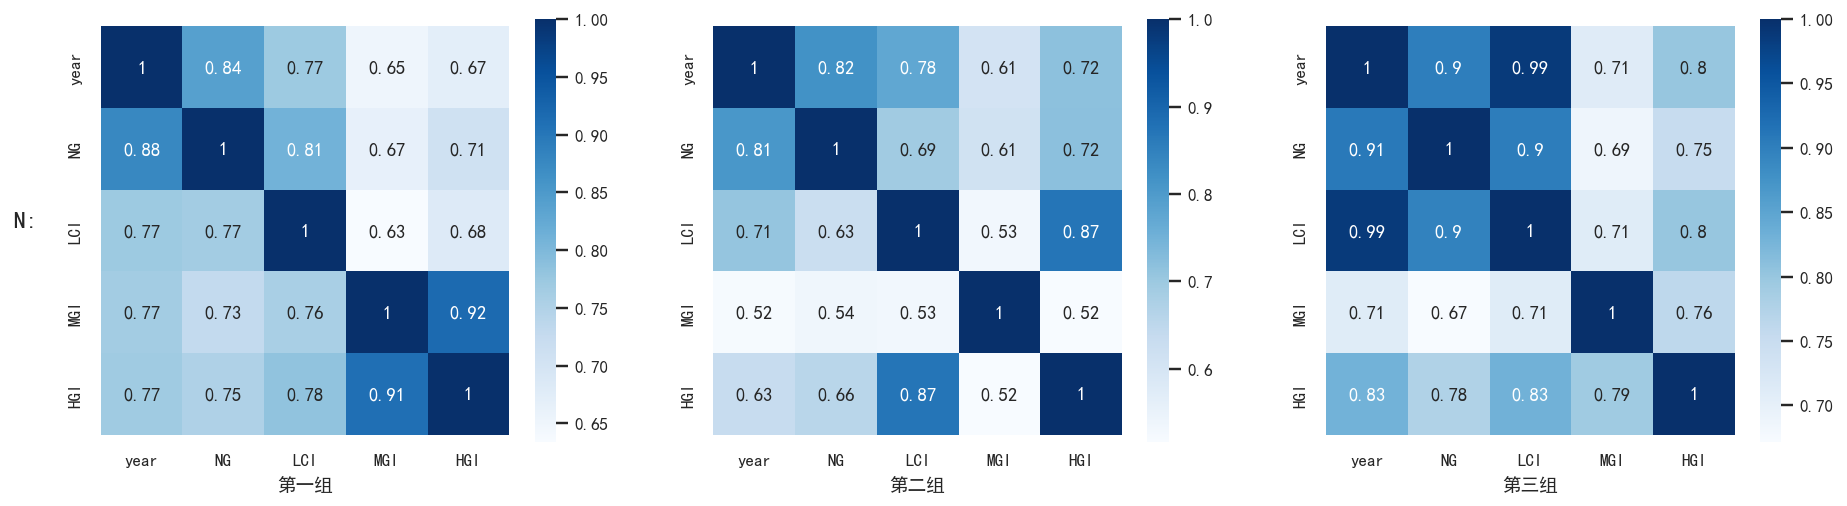

In [27]:
# 结果可视化
import seaborn as sns # 可视化图形调用库
import matplotlib.pyplot as plt
%matplotlib inline

def hzrlt(data1,name1,data2,name2,data3,name3,name4):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题
    plt.subplots(figsize=(16,4),dpi=140,facecolor='w')# 设置画布大小，分辨率，和底色

    plt.subplot(131)
    sns.heatmap(data1 ,annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')
    plt.xlabel(name1)
    plt.ylabel(name4+":      ", rotation=0,fontdict={'size': 12})
    plt.subplot(132)
    sns.heatmap(data2 ,annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')
    plt.xlabel(name2)
    plt.subplot(133)
    sns.heatmap(data3 ,annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')
    plt.xlabel(name3)
hzrlt(soc_gra1,"第一组",soc_gra2,"第二组",soc_gra3,"第三组","SOC")
hzrlt(sic_gra1,"第一组",sic_gra2,"第二组",sic_gra3,"第三组","SIC")
hzrlt(stc_gra1,"第一组",stc_gra2,"第二组",stc_gra3,"第三组","STC")
hzrlt(n_gra1,"第一组",n_gra2,"第二组",n_gra3,"第三组","N")


In [32]:
'''
def daoc(data,name):
    data.to_excel("灰色关联度/"+name+".xlsx")
daoc(soc_gra1,"soc_gra1") 
daoc(soc_gra2,"soc_gra2")
daoc(soc_gra3,"soc_gra3")

daoc(sic_gra1,"sic_gra1") 
daoc(sic_gra2,"sic_gra2")
daoc(sic_gra3,"sic_gra3")

daoc(stc_gra1,"stc_gra1") 
daoc(stc_gra2,"stc_gra2")
daoc(stc_gra3,"stc_gra3")

daoc(n_gra1,"n_gra1") 
daoc(n_gra2,"n_gra2")
daoc(n_gra3,"n_gra3")
'''

3.多元线性回归模型

In [7]:
from re import X
from sklearn.linear_model import LinearRegression #导入机器学习库中的线性回归模块
x_new = np.arange(12).reshape(12,1)
def xxhg(data):
    x=np.array(data['t']).reshape(data['t'].shape[0],1)
    y_soc=data['SOC']
    y_sic=data['SIC']
    y_stc=data['STC']
    y_n=data['N']
    regr=LinearRegression() #创建线性回归模型，参数默认
    regr.fit(x,y_soc)
    soc = regr.predict(x_new)[11]
    regr.fit(x,y_sic)  
    sic = regr.predict(x_new)[11]
    regr.fit(x,y_stc)
    stc = regr.predict(x_new)[11]
    regr.fit(x,y_n)
    n = regr.predict(x_new)[11]
    data_yc = pd.DataFrame({'SOC':[soc],
                            'SIC':[sic],
                            'STC':[stc],
                            'N':[n]})
    return data_yc
G6_yc = xxhg(data3_G6)
G8_yc = xxhg(data3_G8)
G9_yc = xxhg(data3_G9)
G11_yc = xxhg(data3_G11)
G12_yc = xxhg(data3_G12)
G13_yc = xxhg(data3_G13)
G16_yc = xxhg(data3_G16)
G17_yc = xxhg(data3_G17)
G18_yc = xxhg(data3_G18)
G19_yc = xxhg(data3_G19)
G20_yc = xxhg(data3_G20)
G21_yc = xxhg(data3_G21)

In [8]:
def hb(data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12):
    newData = data1.append(data2).append(data3).append(data4).append(data5).append(data6).append(data7).append(data8).append(data9).append(data10).append(data11).append(data12)
    newData.to_excel("2023预测值.xlsx")
hb(G6_yc,G8_yc,G9_yc,G11_yc,G12_yc,G13_yc,G16_yc,G17_yc,G18_yc,G19_yc,G20_yc,G21_yc)